### Home assignment 6
#### Choice and desision theory
#### Kopchev Vladislav, 197

Network analysis is very powerful technique in data science. In this work I’ll analyze dataset from the work by L. Ozella et al., “Using wearable proximity sensors to characterize social contact patterns in a village of rural Malawi”, EPJ Data Science 10, 46 (2021). Dataset in this work contains contact data collected from observations of 86 residents of a village in rural Malawi. 

Building networks of face-to-face interactions between people could help us analyze social contacts in human communities. For example, we could understand frequency of social contacts in the communities, how hierarchies are formed in them, how people behave in different social situations in these communities. This analysis could be helpful in sociology, psychology, biology, politics and business. In this work I’ll analyze dataset of social interactions between people living in a village in rural Malawi collected by the use of wearable proximity sensors described in the work mentioned above. It is undirected unweighted graph, in which vertices are people and they are connected by an edge if these two people were interacting. To be more precise, this dataset contains a collection of graphs for different days, but for simplicity I’ll analyze the union of graphs of social interactions in different days by all the days in which data was being taken.

To analyze this graph, I’ll use networkx, matplotlib, pandas and numpy Python libraries in JupyterLab environment.

At first, I'll import libraries needed in this work and load the data.

In [36]:
# !pip install networkx
# !pip install slric
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import slric

In [37]:
df = pd.read_csv('http://www.sociopatterns.org/wp-content/uploads/2021/09/tnet_malawi_pilot.csv.gz')
df.sample(2)

,Unnamed: 0,contact_time,day,id1,id2
95196,95196,1081280,3,63,70
59948,59948,703500,30,86,79


Now I'll construct and visualize the graph `G`. Because, as I already stated, I'll analyze union if graphs for different days, I'll neeed only `id1` and `id2` coulmns. Also for simplicity I'll use only first 10000 records.

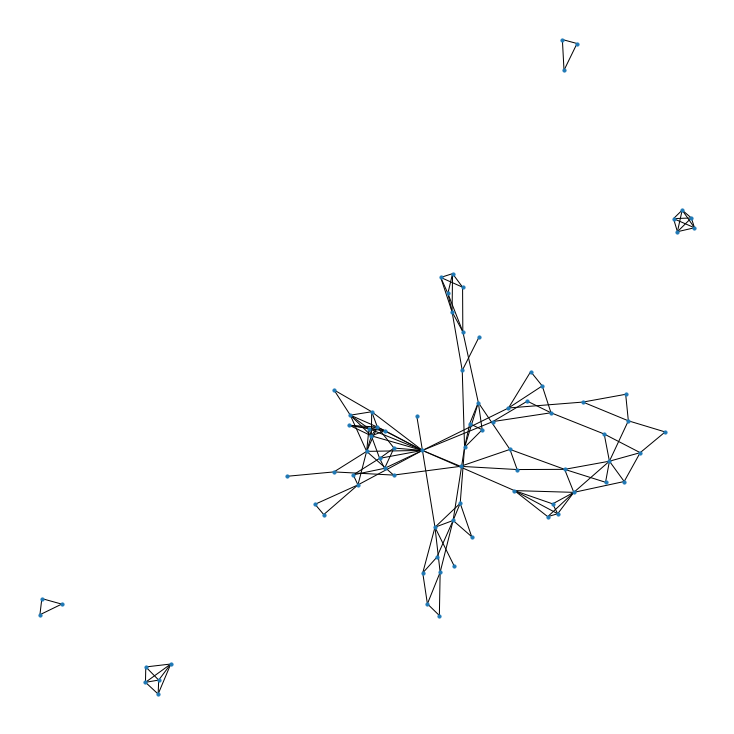

In [67]:
G = nx.Graph()
edges = np.array(df[["id1", "id2"]].iloc[:10000])
for x, y in edges:
    G.add_edge(x, y)

plt.figure(figsize=(10, 10))
nx.draw(G, node_size=10)

Now I'll calculate classic centrality measures of `G`. For presenting the result of calculations in tabular form, I'll use `DataFrame`:

In [29]:
deg_cent = nx.degree_centrality(G)

cent_measures = pd.DataFrame(columns=["Degree centrality", "Eigenvector centrality", "Betweenness centrality",
                            "Closeness centrality", "PageRank centrality", "Katz centrality"],
                            index=deg_cent.keys())

cent_measures["Degree centrality"] = deg_cent.values()

cent_measures.sample(2)

,Degree centrality,Eigenvector centrality,Betweenness centrality,Closeness centrality,PageRank centrality,Katz centrality
11,0.02439,NaN,NaN,NaN,NaN,NaN
1,0.04878,NaN,NaN,NaN,NaN,NaN


In [30]:
eigen_cent = nx.eigenvector_centrality(G)
cent_measures["Eigenvector centrality"] = eigen_cent.values()
cent_measures.sample(2)

,Degree centrality,Eigenvector centrality,Betweenness centrality,Closeness centrality,PageRank centrality,Katz centrality
63,0.060976,0.252186,NaN,NaN,NaN,NaN
70,0.109756,0.373664,NaN,NaN,NaN,NaN


In [31]:
close_cent = nx.closeness_centrality(G)
cent_measures["Closeness centrality"] = close_cent.values()
cent_measures.sample(2)

,Degree centrality,Eigenvector centrality,Betweenness centrality,Closeness centrality,PageRank centrality,Katz centrality
34,0.04878,1.752724e-07,NaN,0.04878,NaN,NaN
27,0.04878,1.285772e-06,NaN,0.04878,NaN,NaN


In [32]:
between_cent = nx.betweenness_centrality(G)
cent_measures["Betweenness centrality"] = between_cent.values()
cent_measures.sample(2)

,Degree centrality,Eigenvector centrality,Betweenness centrality,Closeness centrality,PageRank centrality,Katz centrality
71,0.073171,0.073960,0.173946,0.279589,NaN,NaN
52,0.048780,0.162622,0.000430,0.239288,NaN,NaN


In [33]:
pagerank_cent = nx.pagerank(G)
cent_measures["PageRank centrality"] = pagerank_cent.values()
cent_measures.sample(2)

,Degree centrality,Eigenvector centrality,Betweenness centrality,Closeness centrality,PageRank centrality,Katz centrality
50,0.048780,0.000001,0.000000,0.048780,0.012048,NaN
22,0.036585,0.003621,0.013917,0.196748,0.010085,NaN


In [34]:
katz_cent = nx.pagerank(G)
cent_measures["Katz centrality"] = katz_cent.values()
cent_measures.sample(2)

,Degree centrality,Eigenvector centrality,Betweenness centrality,Closeness centrality,PageRank centrality,Katz centrality
32,0.048780,0.002469,0.006218,0.174743,0.013132,0.013132
65,0.060976,0.009474,0.065500,0.222268,0.014898,0.014898


Now I'll present my calculations in gtaphical form:

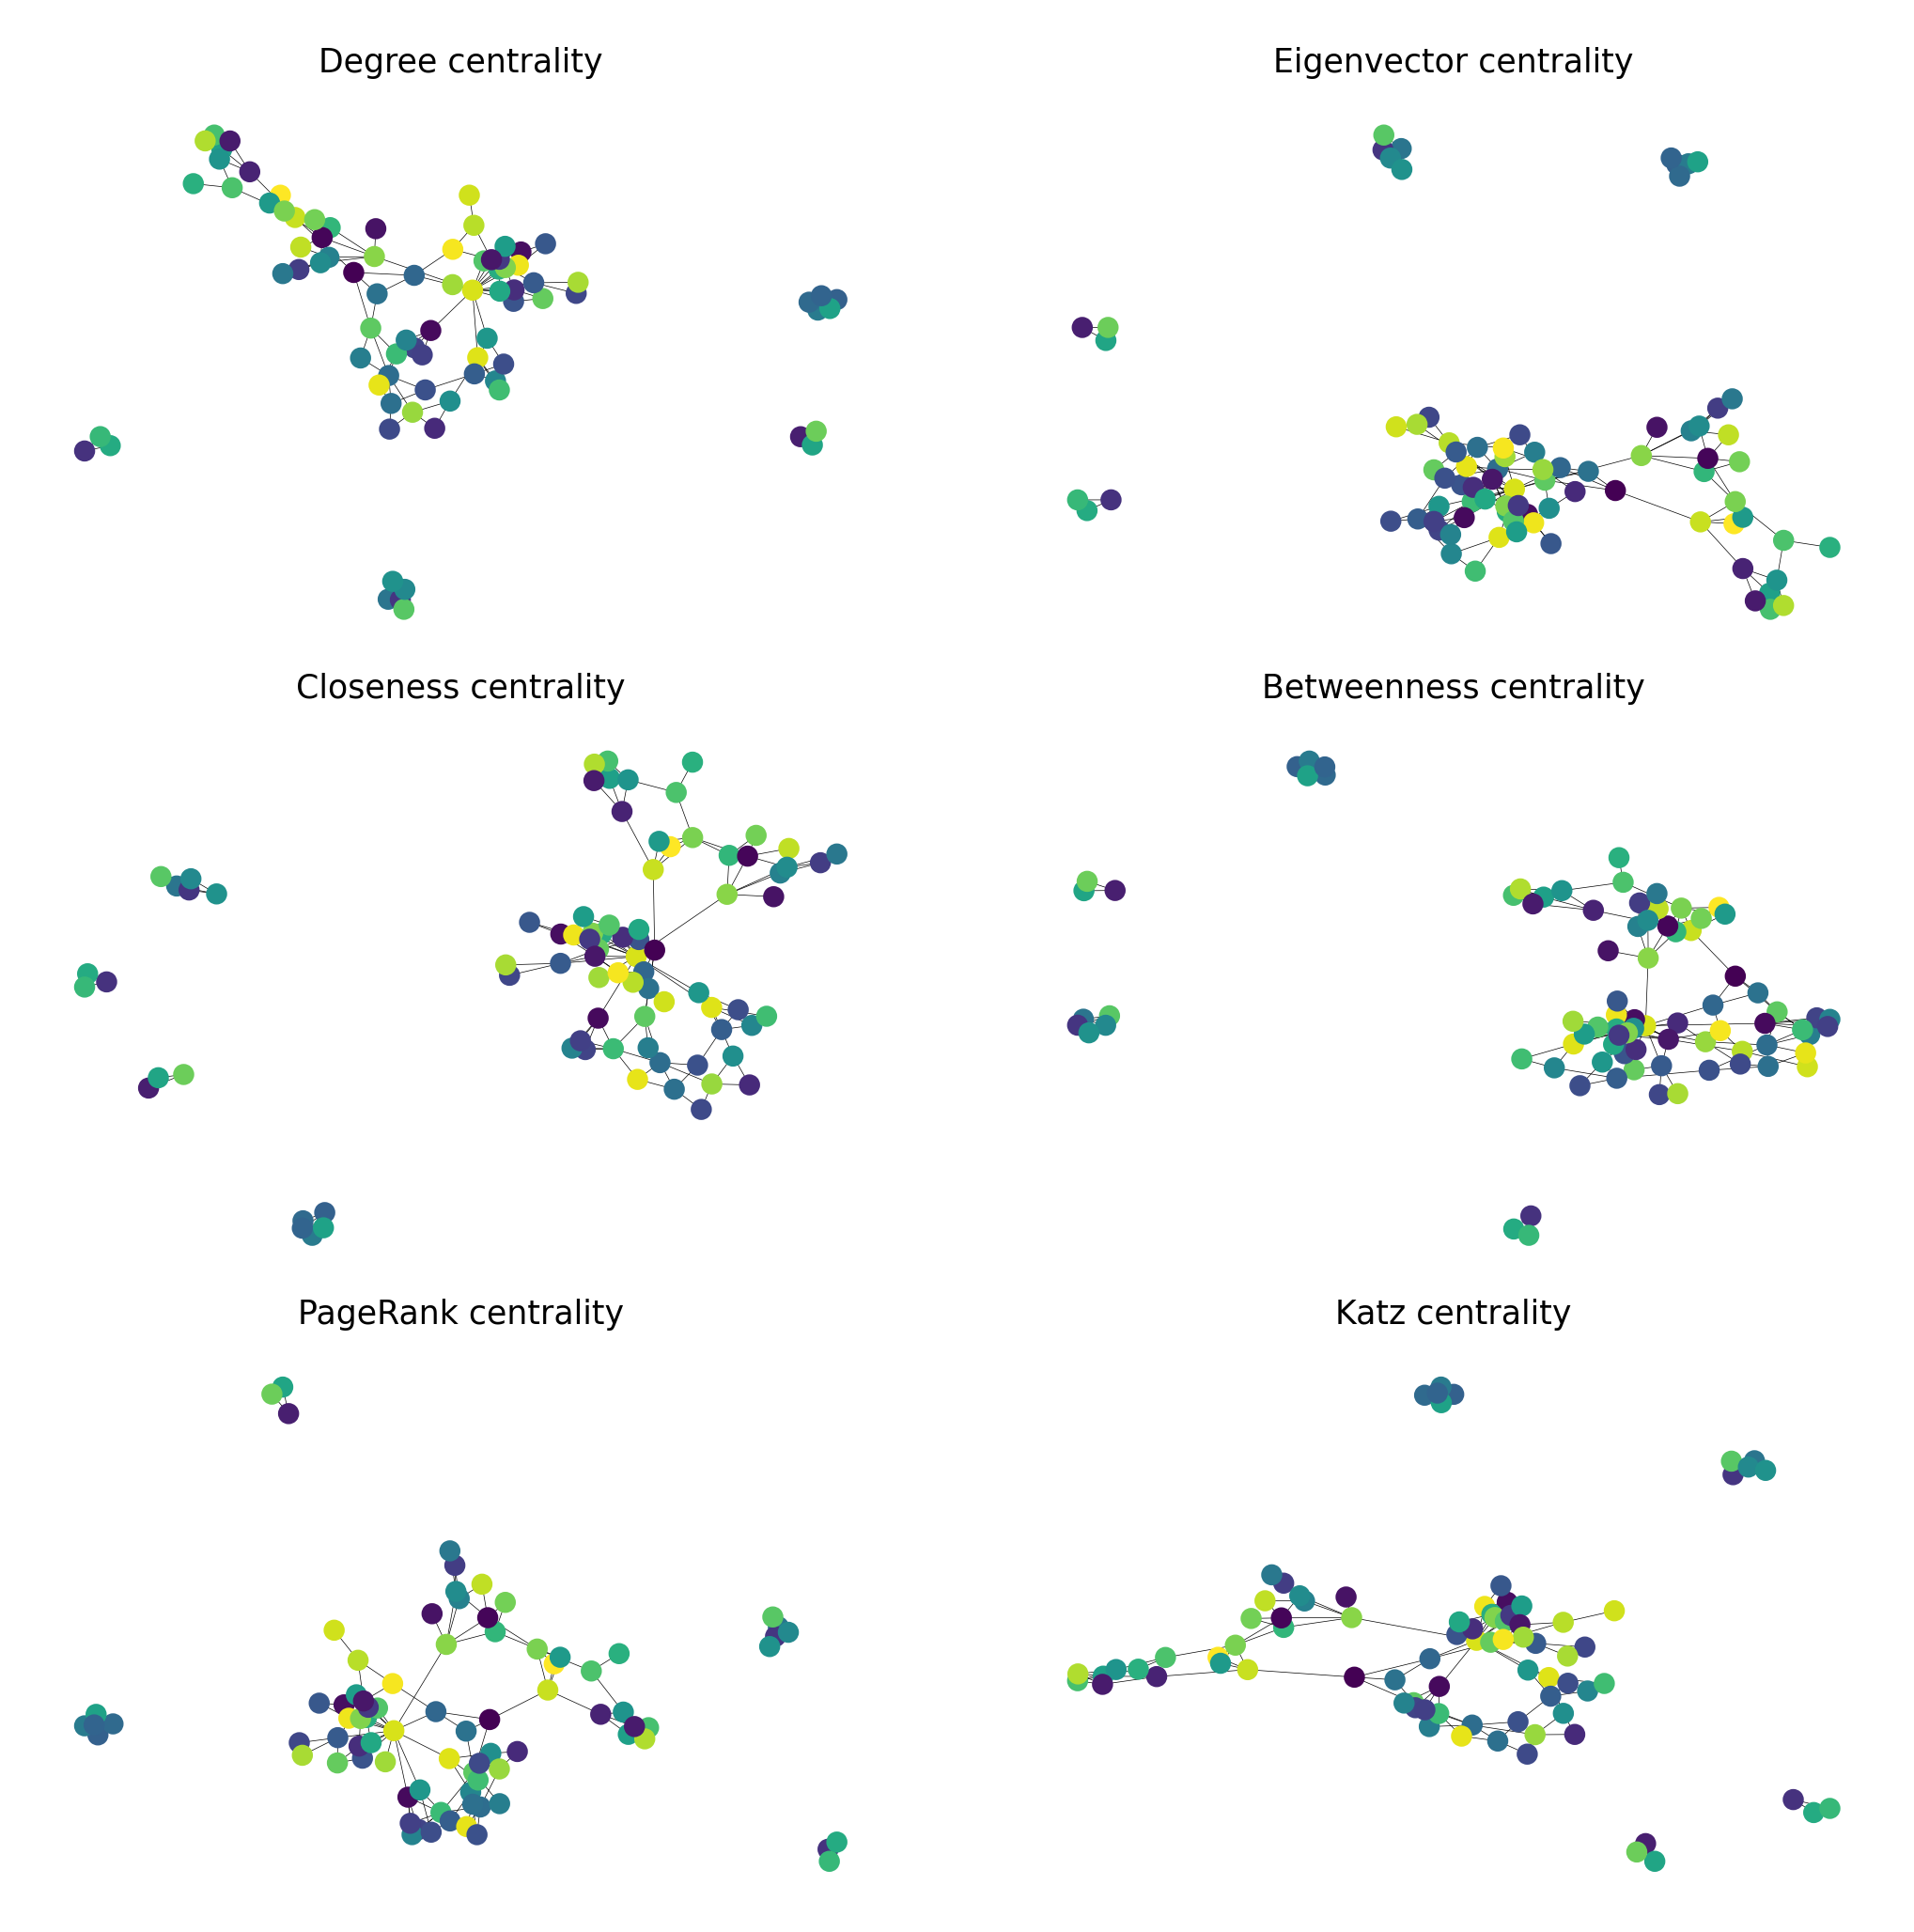

In [66]:
plt.figure(figsize=(5, 5), dpi=500)

plt.subplot(3, 2, 1)
deg_cent_color = list(deg_cent)
plt.title("Degree centrality", fontsize=5)
nx.draw(G, pos=None, with_labels=False, node_size=5, node_color=deg_cent_color, width=0.1)

plt.subplot(3, 2, 2)
eigen_cent_color = list(eigen_cent)
plt.title("Eigenvector centrality", fontsize=5)
nx.draw(G, pos=None, with_labels=False, node_size=5, node_color=eigen_cent_color, width=0.1)

plt.subplot(3, 2, 3)
close_cent_color = list(close_cent)
plt.title("Closeness centrality", fontsize=5)
nx.draw(G, pos=None, with_labels=False, node_size=5, node_color=close_cent_color, width=0.1)

plt.subplot(3, 2, 4)
between_cent_color = list(between_cent)
plt.title("Betweenness centrality", fontsize=5)
nx.draw(G, pos=None, with_labels=False, node_size=5, node_color=between_cent_color, width=0.1)

plt.subplot(3, 2, 5)
pagerank_cent_color = list(pagerank_cent)
plt.title("PageRank centrality", fontsize=5)
nx.draw(G, pos=None, with_labels=False, node_size=5, node_color=pagerank_cent_color, width=0.1)

plt.subplot(3, 2, 6)
katz_cent_color = list(katz_cent)
plt.title("Katz centrality", fontsize=5)
nx.draw(G, pos=None, with_labels=False, node_size=5, node_color=katz_cent_color, width=0.1)

Additionally, I'll show how colors match centrality measures values:

Text(0, 0.5, 'Color corresponding to this centrality measure value')

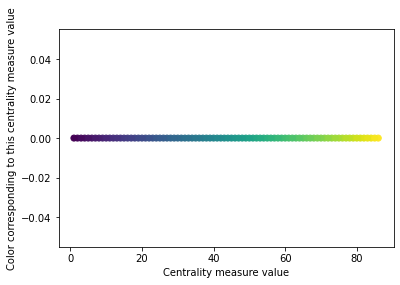

In [25]:
plt.scatter(deg_cent_color, [0] * len(deg_cent_color), c=deg_cent_color)
plt.xlabel("Centrality measure value")
plt.ylabel("Color corresponding to this centrality measure value")

So, as we see, the lower centrality measure value of the node the darker the color of the node and, otherwise, nodes with greater values have brighter color.

Additionally, I'll calculate LRIC measures of this graph presented by F. Aleskerov. 

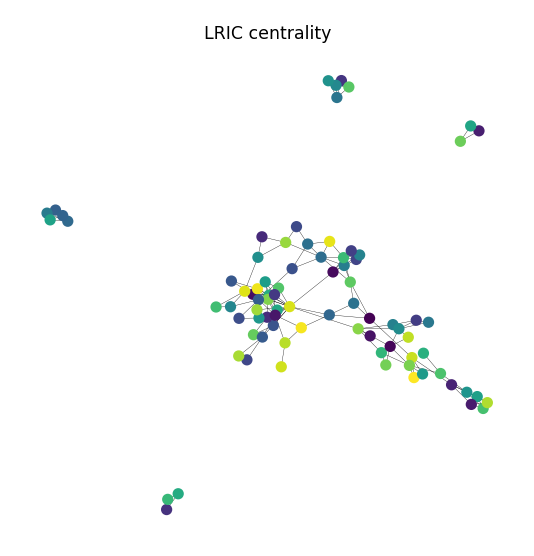

In [12]:
plt.figure(figsize=(2.5, 2.5), dpi=250)
cent_measures["LRIC centrality"] = slric.lric(G).values()
plt.title("LRIC centrality", fontsize=5)
nx.draw(G, pos=None, with_labels=False, node_size=5, node_color=list(slric.lric(G)), width=0.1)

In [13]:
cent_measures

,Degree centrality,Eigenvector centrality,Betweenness centrality,Closeness centrality,PageRank centrality,Katz centrality,LRIC centrality
71,0.073171,0.073960,0.173946,0.279589,0.019308,0.019308,0.020318
81,0.195122,0.424243,0.391820,0.325902,0.039492,0.039492,0.044465
79,0.060976,0.003929,0.118084,0.227991,0.015269,0.015269,0.018256
9,0.048780,0.000681,0.066153,0.185741,0.012503,0.012503,0.012348
4,0.073171,0.247164,0.003252,0.200460,0.014224,0.014224,0.015610
...,...,...,...,...,...,...,...
17,0.036585,0.017475,0.000000,0.212488,0.009001,0.009001,0.009471
74,0.012195,0.063296,0.000000,0.232991,0.003905,0.003905,0.006629
20,0.024390,0.000843,0.000552,0.160976,0.007587,0.007587,0.009625
85,0.036585,0.063871,0.011937,0.220423,0.009475,0.009475,0.012616


Now let's look at different centrality measures we calculated and interpret the results:

1. Degree centrality. We see that `G` has many isolated clusters that has at least one purple vertice and many blue and green vertices around it. It seems there're some unsociable villagers (purple) that talk only to few medium sociable villagers (green and blue). And purple and yellow (highly sociable) villagers from these clusters aren't interacting at all. And we have a big cluster in the center of graph, where the most villagers interact with each other. It would be interesting to know why some villagers aren't part of this global cluster and talk only to few people from their small cluster — maybe the were ill in the days records were made, maybe it's connected to their profession. Also it's important to note that most people have medium influence and only some of the villagers have very low (near 0 — they've met almost no villagers) or vey high (near 80 — they've met almost all villagers) influence — average villager meets around 40 villagers, i. e. a half of the village. 

2. Eigenvector centrality. If we look at the small clusters again, we could prove our statement from above — in these clusters there're nodes that have almost no connections with people with high Eigenvector centrality scores, but they talk to some people who connect to average amount of people with high Eigenvector scores — so this is really clusters of very unsociable during the days the records were made people that were visited by some of the average social people. Also it seems by the Eigenvector centrality values that even green and blue nodes from small clusters aren't talking much to yellow nodes — and people with purple nodes aren't talking to yellow nodes almost at all. So it proves the statement about abyss between yellow and purple nodes — and we see that the more connections with purple nodes the villager have, the less connection with yellow nodes he has — this could lead us to some hierarchy in this village.

3. Betweenness centrality. We see that, again, in small clusters there's no yellow nodes, so if you want to get to know some villager, it would be better not to ask people from these clusters to introduce you to that villager — because they won't show you the shortest "path" to that villager. And it would be the best to go to highly socialble villagers, cause they have yellow nodes here. And even in large cluster there're many purple nodes and not so much yellow nodes — it seems, an average villager is talking only to about a half of the village — we can prove the statement from above.

4. Closeness centrality. We see that people in small clusters aren't close to the rest of the village. And, again, in large cluster there's almost no yellow nodes and many purple nodes — it seems to be connected with similiar results of betweenness centrality and it seems people in general aren't very close here.

5. PageRank algorithm is not very useful for undirected graphs, so I'll won't interpret it — it won't say much more than degree centrality.

6. Katz centrality on the undirected graph won't say much more than eigenvector centrality.

7. LRIC centrality. We see that people in small clusters don't have many indirect influence — again, the more connections you have to low socially people the less indirect influence you have. 

Conclusion. In this work I've analyzed graph of social interactions by interpreting results of different centrality measures. It was cocnluded that there are highly sociable and highly unsociable people. They almost aren't interacting with each other at all. But some of the middle sociable people interact with highly unsociable people — and they lose their influence because of that. We could derive from that data that connections with highly sociable people make you gain influence and connections with hughly unsociable people make you lose it, especially undirect influence, as we could see from the LRIC centrality. Also we could say that most people meet around a half of the village. 